# Stock Prediction Analysis - Time Series
<b>LSTM models can be used to forecast time series (as well as other Recurrent Neural Networks). LSTM is an acronym that stands for Long-Short Term Memories. </b>


In [24]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the stock prices of all companies in a dataframe
dataset = pd.read_csv('../data/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv')
stocks = dataset.loc[(dataset['date']>='2017-01-01') & (dataset['date']<='2017-12-31')]

In [3]:
# getting the list of all companies 
companies = stocks.ticker.unique()
companies.sort()

In [4]:
from sklearn.preprocessing import MinMaxScaler

period = 60
x_train = []
y_train = []
companies_sc = []

for company in companies:
    
    sc = MinMaxScaler()
    stock = stocks.loc[stocks['ticker'] == company]
    
    # creating an array with adjusted closing prices
    training_set = stock[['adj_close']].values
    
    # normalizing the values
    training_set_scaled = sc.fit_transform(training_set)
    training_set_scaled.shape
    
    # In the below cell, we are appendding data to x_train and y_train.¶
    
    length = len(training_set)
    for i in range(period, length):
        x_train.append(training_set_scaled[i-period:i, 0])
        y_train.append(training_set_scaled[i, 0])
        
    companies_sc.append(sc)
        
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape

(970963, 60)

In [5]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(970963, 60, 1)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 92, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 92, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [7]:
train = model.fit(x_train, y_train, epochs = 10, batch_size = 3000, validation_split=0.33)

Epoch 1/10
217/217 [==============================] - 427s 2s/step - loss: 0.0238 - val_loss: 0.0053
Epoch 2/10
217/217 [==============================] - 419s 2s/step - loss: 0.0061 - val_loss: 0.0034
Epoch 3/10
217/217 [==============================] - 453s 2s/step - loss: 0.0045 - val_loss: 0.0027
Epoch 4/10
217/217 [==============================] - 407s 2s/step - loss: 0.0039 - val_loss: 0.0025
Epoch 5/10
217/217 [==============================] - 425s 2s/step - loss: 0.0037 - val_loss: 0.0025
Epoch 6/10
217/217 [==============================] - 568s 3s/step - loss: 0.0036 - val_loss: 0.0025
Epoch 7/10
217/217 [==============================] - 400s 2s/step - loss: 0.0035 - val_loss: 0.0026
Epoch 8/10
217/217 [==============================] - 401s 2s/step - loss: 0.0035 - val_loss: 0.0025
Epoch 9/10
217/217 [==============================] - 436s 2s/step - loss: 0.0035 - val_loss: 0.0025
Epoch 10/10
217/217 [==============================] - 461s 2s/step - loss: 0.0034 - val_lo

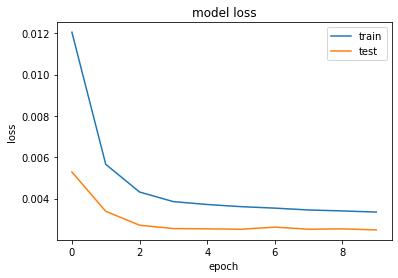

In [8]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [9]:
test_set = dataset.loc[(dataset['ticker'] == 'AAPL') & (dataset['date']>='2018-01-01')]  
test_set = test_set.loc[:, test_set.columns == 'adj_close']

In [10]:
y_test = test_set.iloc[period:, 0:].values

In [11]:
sc = companies_sc[np.where(companies=="AAPL")[0][0]]
# storing all values in a variable for generating an input array for our model 
adj_closing_price = test_set.iloc[:, 0:].values
adj_closing_price_scaled = sc.transform(adj_closing_price)

In [12]:
# the model will predict the values on x_test
x_test = [] 
length = len(test_set)

for i in range(period, length):
    x_test.append(adj_closing_price_scaled[i-period:i, 0])
    
x_test = np.array(x_test)

In [13]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(104, 60, 1)

In [14]:
# predicting the stock price values
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)

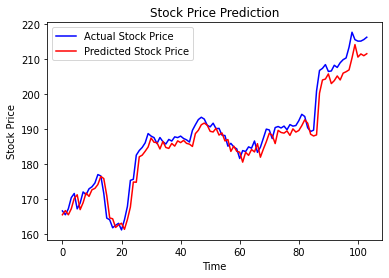

In [15]:
# plotting the results
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
stock_train_set = dataset.loc[(dataset['ticker'] == 'AAPL') & 
                              (dataset['date']>='2017-06-01') & 
                              (dataset['date']<='2017-12-31')]
stock_train_set = stock_train_set.loc[:, stock_train_set.columns == 'adj_close']

In [17]:
y_train = stock_train_set.iloc[period:, 0:].values

In [18]:
stock_acp = stock_train_set.iloc[:, 0:].values
stock_acp_scaled = sc.transform(stock_acp)


In [19]:
x_train = [] 
length = len(stock_train_set)

for i in range(period, length):
    x_train.append(stock_acp_scaled[i-period:i, 0])
    
x_train = np.array(x_train)
x_train.shape

(88, 60)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(88, 60, 1)

In [21]:
# predicting the adjusted closing price values
y_train_pred = model.predict(x_train)
train_predicted_price = sc.inverse_transform(y_train_pred)

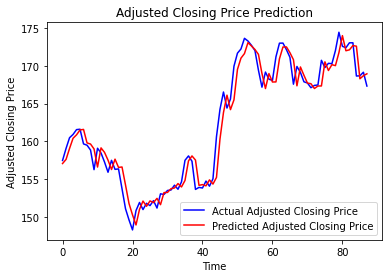

In [22]:
# plotting the results
plt.plot(y_train, color = 'blue', label = 'Actual Adjusted Closing Price')
plt.plot(train_predicted_price, color = 'red', label = 'Predicted Adjusted Closing Price')
plt.title('Adjusted Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
# Calculate RMSE
trainScore = mean_squared_error(y_train, train_predicted_price)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, predicted_price)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 3.12 MSE
Test Score: 9.93 MSE
